In [1]:
import os 
import sys 
import cv2 
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import load_model                                                                       
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

from sklearn.manifold import TSNE
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [3]:
model = load_model('models/freezed-model-185-1.00.h5') 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
input_layer = model.input                                                                                            
output_layer = model.get_layer('block5_conv3')                                                                       
prediction_model = models.Model(inputs=input_layer, outputs=output_layer.output)  

In [5]:
datagen = ImageDataGenerator(rescale=1.0/255.0) 
batch_size, target_size, class_mode = 8, (224, 224), 'binary' 
number_of_epochs = 100 
# prepare iterators 
path = "./data/" 

train_it = datagen.flow_from_directory(path + './', batch_size=batch_size, target_size=target_size)

output_data = prediction_model.predict(train_it)
reshaped_output_data = output_data.reshape(360, 14*14*512)

Found 360 images belonging to 12 classes.


In [6]:
data_labels = []
class_indices_data = train_it.class_indices
for img_label in train_it.labels:
    for val, key in enumerate(class_indices_data):
        if img_label == val:
            data_labels.append(key)
            break

In [6]:
flat_img_array = np.array(reshaped_output_data)
normed_matrix = normalize(flat_img_array)

# model = TSNE(
#     n_components=2,
#     n_iter=300,
#     random_state=0,
#     perplexity=15
# )
# tsne_data = model.fit_transform(normed_matrix)

# tsne_data = np.vstack((tsne_data.T, data_labels)).T
# tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# bp = sn.FacetGrid(tsne_df, hue="label", height=6, legend_out=False).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(title="Insect Type", label_order=['bombyliidae','pelecorhynchidae','scarabaeidae','syrphidae_bee_mimic','syrphidae_wasp_mimic','tachinidae_bee_mimic','tachinidae_fly_mimic'])
# plt.show()

In [7]:
tsne = TSNE(n_components=2, random_state=0, n_iter=2000)
tsne_res = tsne.fit_transform(normed_matrix)

In [3]:
# with open("mimic_bee_numpy_tsne_result.npy", 'wb') as f:
#     np.save(f, tsne_res)
    
# with open("mimic_bee_numpy_tsne_result.npy", 'rb') as f:
#     tsne_res = np.load(f)
    
# tsne_res

array([[ -9.083643  ,   9.894263  ],
       [ 11.428641  ,  -1.9135125 ],
       [ -2.0550523 ,   1.9847482 ],
       [ -7.366774  , -12.742527  ],
       [ -2.2631626 ,   0.9484382 ],
       [ -2.8618147 ,  -2.225057  ],
       [  1.4112978 , -11.0099    ],
       [-11.804557  ,  10.0187235 ],
       [ 10.98099   ,  -4.7087507 ],
       [  9.218656  ,  -1.3310425 ],
       [ -9.942764  ,   5.121854  ],
       [ -1.9511385 ,   1.8233428 ],
       [ 11.788334  ,   8.840007  ],
       [-11.043895  ,   7.546932  ],
       [ -1.8290929 ,   9.670005  ],
       [  9.669949  ,  -2.893203  ],
       [ -1.1387511 ,  -9.88865   ],
       [ -6.8322797 ,  -7.9046016 ],
       [-12.162157  ,   5.7373357 ],
       [  3.065478  ,  10.573547  ],
       [  1.5507307 ,  -9.27744   ],
       [-13.471317  ,   8.275456  ],
       [  1.3920141 ,  12.403696  ],
       [  2.1263707 ,  10.443628  ],
       [ -5.657986  ,   0.17972648],
       [ -9.69197   , -11.990009  ],
       [  0.02935845,  11.522766  ],
 

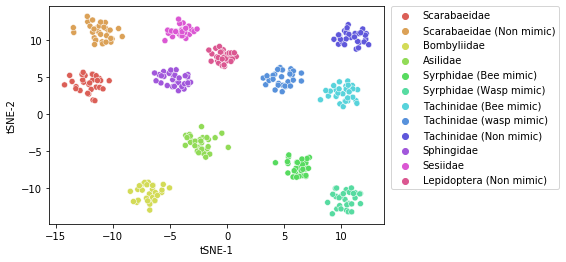

In [9]:
# np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
# print(tsne_res)

sn.scatterplot(
    x=tsne_res[:,0],
    y=tsne_res[:,1],
    hue=data_labels,
    palette=sn.hls_palette(12),
    legend='full',
#     legend=False
)



handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# plt.legend(['bombyliidae','pelecorhynchidae','scarabaeidae','syrphidae_bee_mimic','syrphidae_wasp_mimic','tachinidae_bee_mimic','tachinidae_fly_mimic'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('tSNE-1')
plt.ylabel('tSNE-2')
plt.savefig("output_1.svg", format="svg", bbox_inches='tight', dpi=1200)

In [16]:
for i in range(360):
    if (tsne_res[i][0] > 10 and tsne_res[i][0] < 20) \
    and (tsne_res[i][1] > -10 and tsne_res[i][1] < 3):
        print(i)

6
10
11
16
18
24
26
30
38
39
41
42
44
54
89
111
113
116
122
138
145
163
165
176
188
194
199
214
218
220
233


In [61]:
pwd

'/data/bhuiyan/insect_classifier/tsne_generator'